# Interconnection Temperature Time Series

In [1]:
# Start by importing the packages we need:
import os
import datetime

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from glob import glob
from matplotlib import pyplot 
from mpl_toolkits.axes_grid1 import make_axes_locatable


## Set the Directory Structure

In [2]:
# Identify the data input and output directories:
data_input_dir =  '/Users/burl878/Documents/IMMM/Data/TELL/Analysis/Interconnection_Meteorology_Time_Series/'
image_output_dir =  '/Users/burl878/Documents/IMMM/Images/TELL/Analysis/Interconnection_Meteorology_Time_Series/'


## Make the Time Series Plot

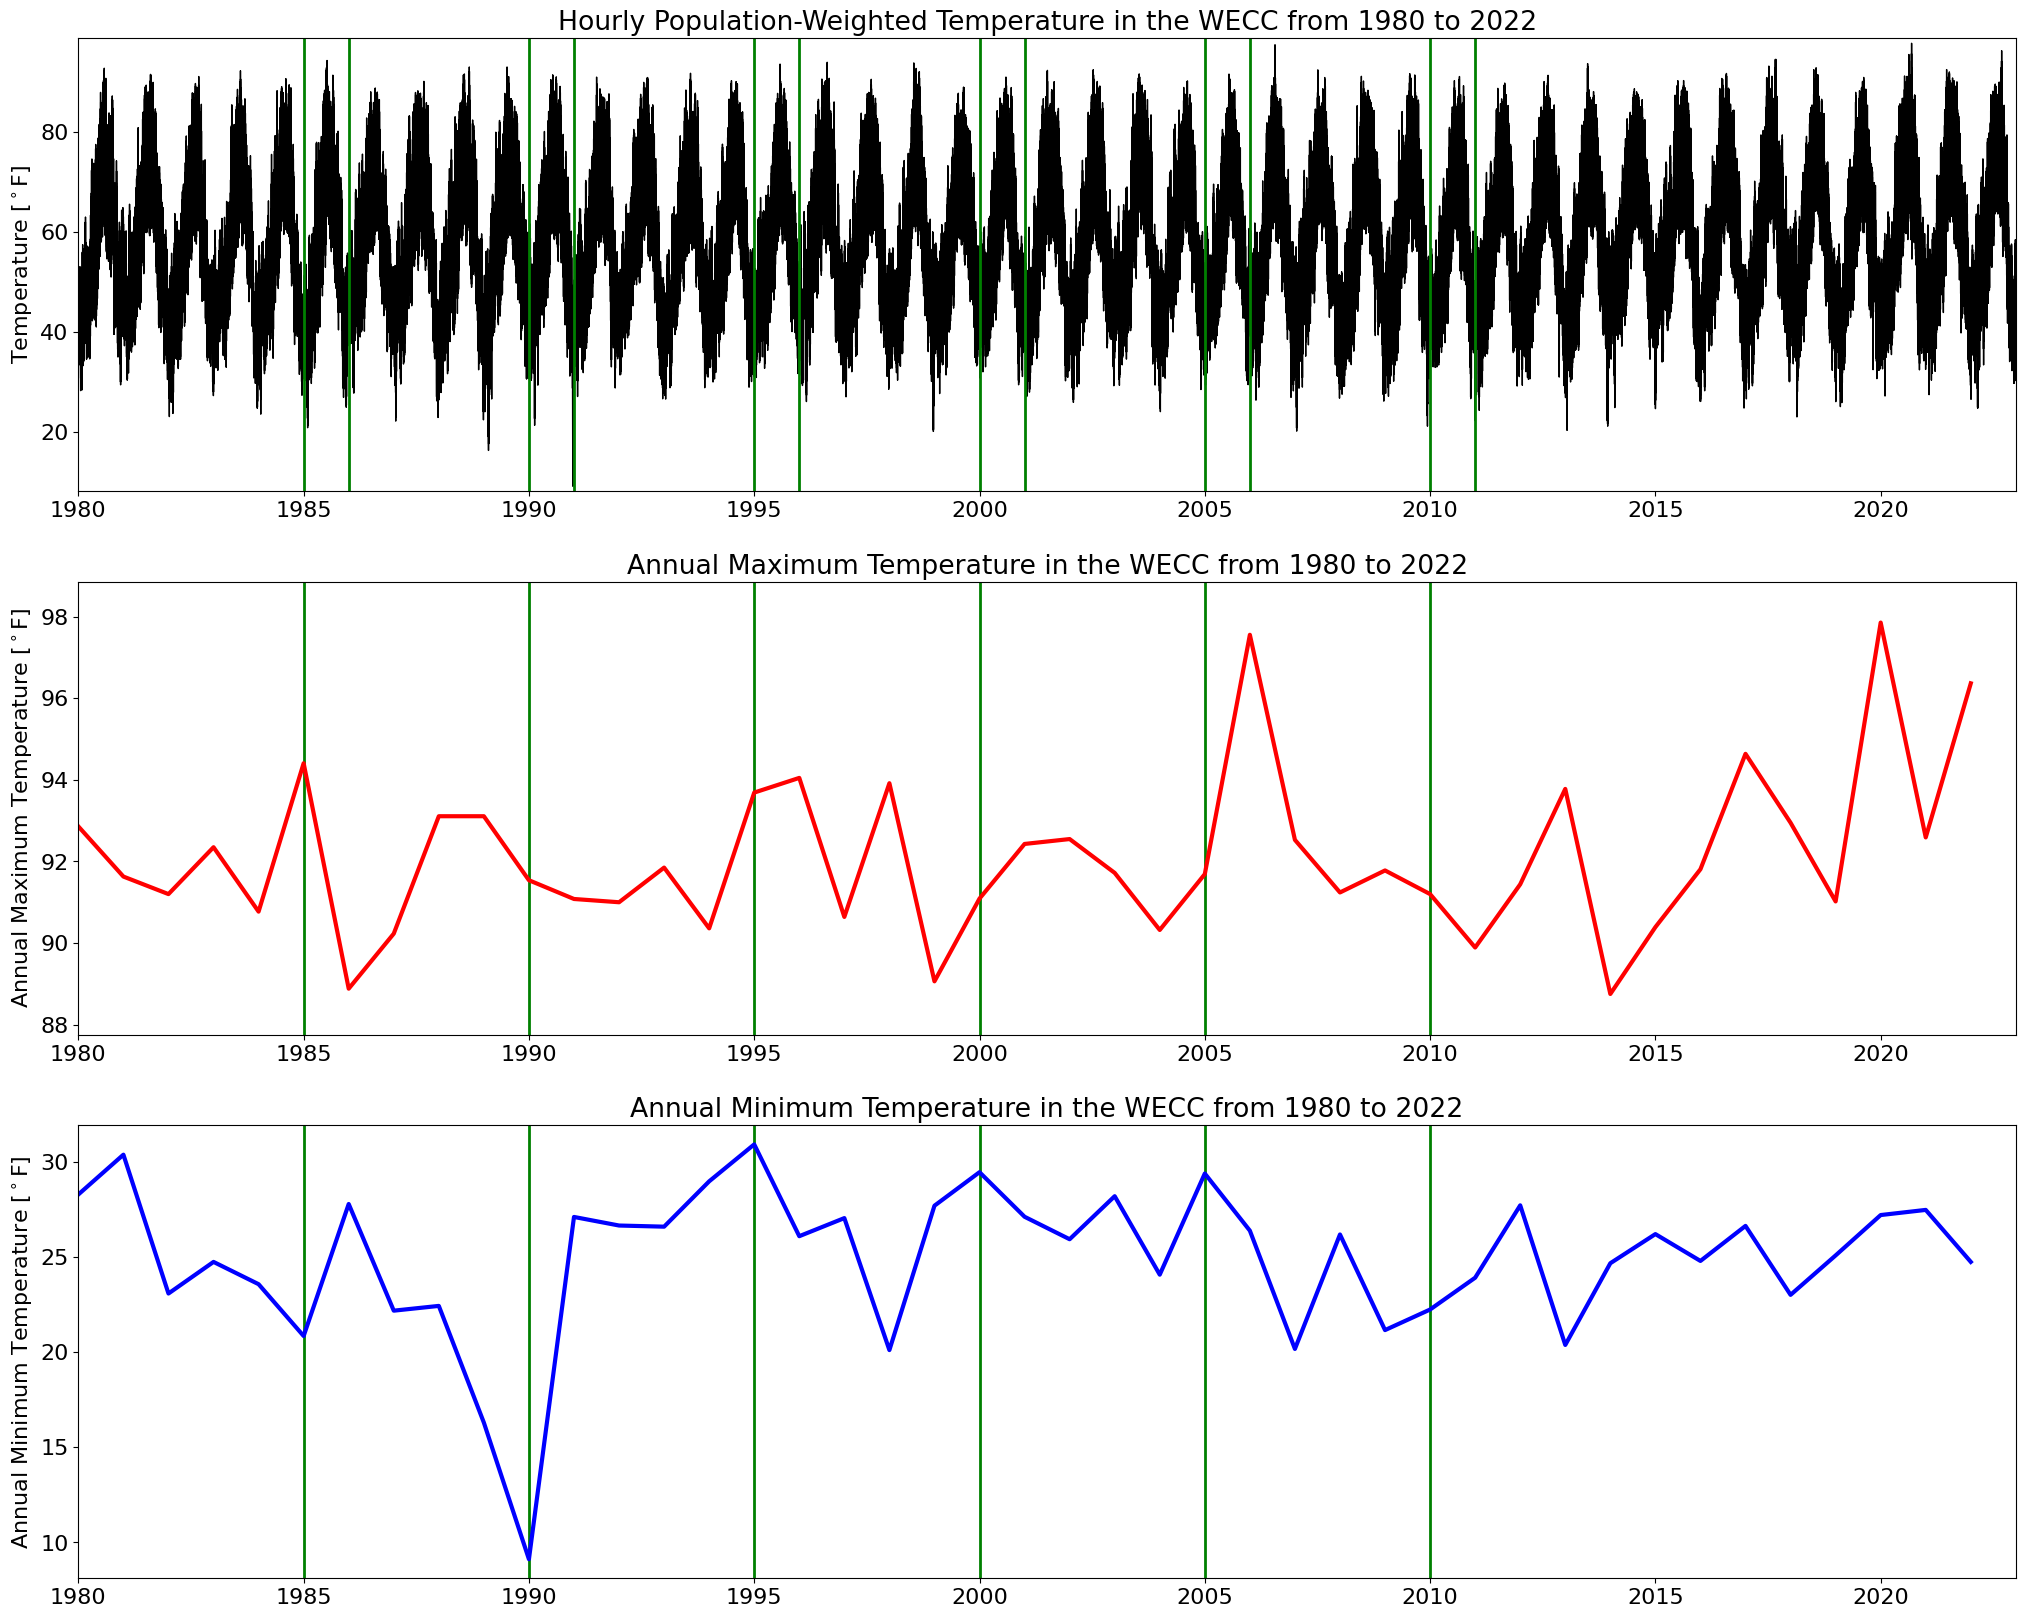

In [37]:
# Give the code for the interconnection you want to analyze:
ics_to_plot = 'WECC'

# Set the start and end years:
start_year = 1980
end_year = 2022

#Initiate a counter to store the results:
counter = 0;
stats_df = pd.DataFrame()

for year in range(start_year, (end_year + 1), 1):
    # Iterate the counter by one:
    counter = counter + 1
        
    # Read in the historical EIA-930 load data:
    temp_df = pd.read_csv((data_input_dir + 'Interconnection_Meteorology_' + str(year) + '.csv'))
    
    # Convert the temperature from Kelvin to Fahrenheit:
    temp_df['T2'] = (1.8 * (temp_df['T2'] - 273)) + 32
    
    # Subset the data to only the interconnection you want to plot:
    temp_df = temp_df[temp_df['Interconnection'] == ics_to_plot]
    
    # Only keep the columns that are needed:
    temp_df = temp_df[['Time_UTC', 'T2']].copy()

    # Add the hottest and coldest times to the output file:
    stats_df.loc[counter, 'Year'] = year
    stats_df.loc[counter, 'Coldest_Hour_UTC'] = temp_df['Time_UTC'].loc[temp_df['T2'].idxmin()]
    stats_df.loc[counter, 'Coldest_Temp_F'] = temp_df['T2'].min().round(2)
    stats_df.loc[counter, 'Hottest_Hour_UTC'] = temp_df['Time_UTC'].loc[temp_df['T2'].idxmax()]
    stats_df.loc[counter, 'Hottest_Temp_F'] = temp_df['T2'].max().round(2)
            
    # Aggregate the output into a new dataframe:
    if year == start_year:
       met_df = temp_df
    else:
       met_df = pd.concat([met_df, temp_df])
    
    # Clean up:
    del temp_df

# Convert the time to a datetime variable:
met_df['Time_UTC'] = pd.to_datetime(met_df['Time_UTC'])

met_df['T2'] = met_df['T2'].round(2)

# Create the ouput filename:    
csv_output_filename = os.path.join(data_input_dir, ('WECC_Temperature_' + str(start_year) + '_to_' + str(end_year) + '.csv'))
        
# Write out the dataframe to a .csv file:
met_df.to_csv(csv_output_filename, sep=',', index=False)

# Make the plot:
plt.figure(figsize=(25, 20))
plt.rcParams['font.size'] = 16
plt.subplot(311)
plt.plot(met_df['Time_UTC'], met_df['T2'], color='k', linestyle='-', linewidth=1)
plt.plot([datetime.date(1985, 1, 1), datetime.date(1985, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(1986, 1, 1), datetime.date(1986, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(1990, 1, 1), datetime.date(1990, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(1991, 1, 1), datetime.date(1991, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(1995, 1, 1), datetime.date(1995, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(1996, 1, 1), datetime.date(1996, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(2000, 1, 1), datetime.date(2000, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(2001, 1, 1), datetime.date(2001, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(2005, 1, 1), datetime.date(2005, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(2006, 1, 1), datetime.date(2006, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(2010, 1, 1), datetime.date(2010, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(2011, 1, 1), datetime.date(2011, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.xlim([datetime.date(1980, 1, 1), datetime.date(2022, 12, 31)])
plt.ylim([met_df['T2'].min()-1, met_df['T2'].max()+1])
#plt.ylim([80, met_df['T2'].max()+2])
plt.xlabel('')
plt.ylabel('Temperature [$^\circ$F]')
plt.title(('Hourly Population-Weighted Temperature in the ' + ics_to_plot + ' from ' + str(start_year) + ' to ' + str(end_year)))

plt.subplot(312)
plt.plot([1985, 1985], [stats_df['Hottest_Temp_F'].min()-1, stats_df['Hottest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot([1990, 1990], [stats_df['Hottest_Temp_F'].min()-1, stats_df['Hottest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot([1995, 1995], [stats_df['Hottest_Temp_F'].min()-1, stats_df['Hottest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot([2000, 2000], [stats_df['Hottest_Temp_F'].min()-1, stats_df['Hottest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot([2005, 2005], [stats_df['Hottest_Temp_F'].min()-1, stats_df['Hottest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot([2010, 2010], [stats_df['Hottest_Temp_F'].min()-1, stats_df['Hottest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot(stats_df['Year'], stats_df['Hottest_Temp_F'], color='r', linestyle='-', linewidth=3)
plt.xlim([1980, 2023])
plt.ylim([stats_df['Hottest_Temp_F'].min()-1, stats_df['Hottest_Temp_F'].max()+1])
plt.xlabel('')
plt.ylabel('Annual Maximum Temperature [$^\circ$F]')
plt.title(('Annual Maximum Temperature in the ' + ics_to_plot + ' from ' + str(start_year) + ' to ' + str(end_year)))

plt.subplot(313)
plt.plot([1985, 1985], [stats_df['Coldest_Temp_F'].min()-1, stats_df['Coldest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot([1990, 1990], [stats_df['Coldest_Temp_F'].min()-1, stats_df['Coldest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot([1995, 1995], [stats_df['Coldest_Temp_F'].min()-1, stats_df['Coldest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot([2000, 2000], [stats_df['Coldest_Temp_F'].min()-1, stats_df['Coldest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot([2005, 2005], [stats_df['Coldest_Temp_F'].min()-1, stats_df['Coldest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot([2010, 2010], [stats_df['Coldest_Temp_F'].min()-1, stats_df['Coldest_Temp_F'].max()+1], color='g', linestyle='-', linewidth=2)
plt.plot(stats_df['Year'], stats_df['Coldest_Temp_F'], color='b', linestyle='-', linewidth=3)
plt.xlim([1980, 2023])
plt.ylim([stats_df['Coldest_Temp_F'].min()-1, stats_df['Coldest_Temp_F'].max()+1])
plt.xlabel('')
plt.ylabel('Annual Minimum Temperature [$^\circ$F]')
plt.title(('Annual Minimum Temperature in the ' + ics_to_plot + ' from ' + str(start_year) + ' to ' + str(end_year)))

plt.savefig(os.path.join(image_output_dir, (ics_to_plot + '_Temperature_' + str(start_year) + '_' + str(end_year) + '.png')), dpi=300, bbox_inches='tight', facecolor='white')


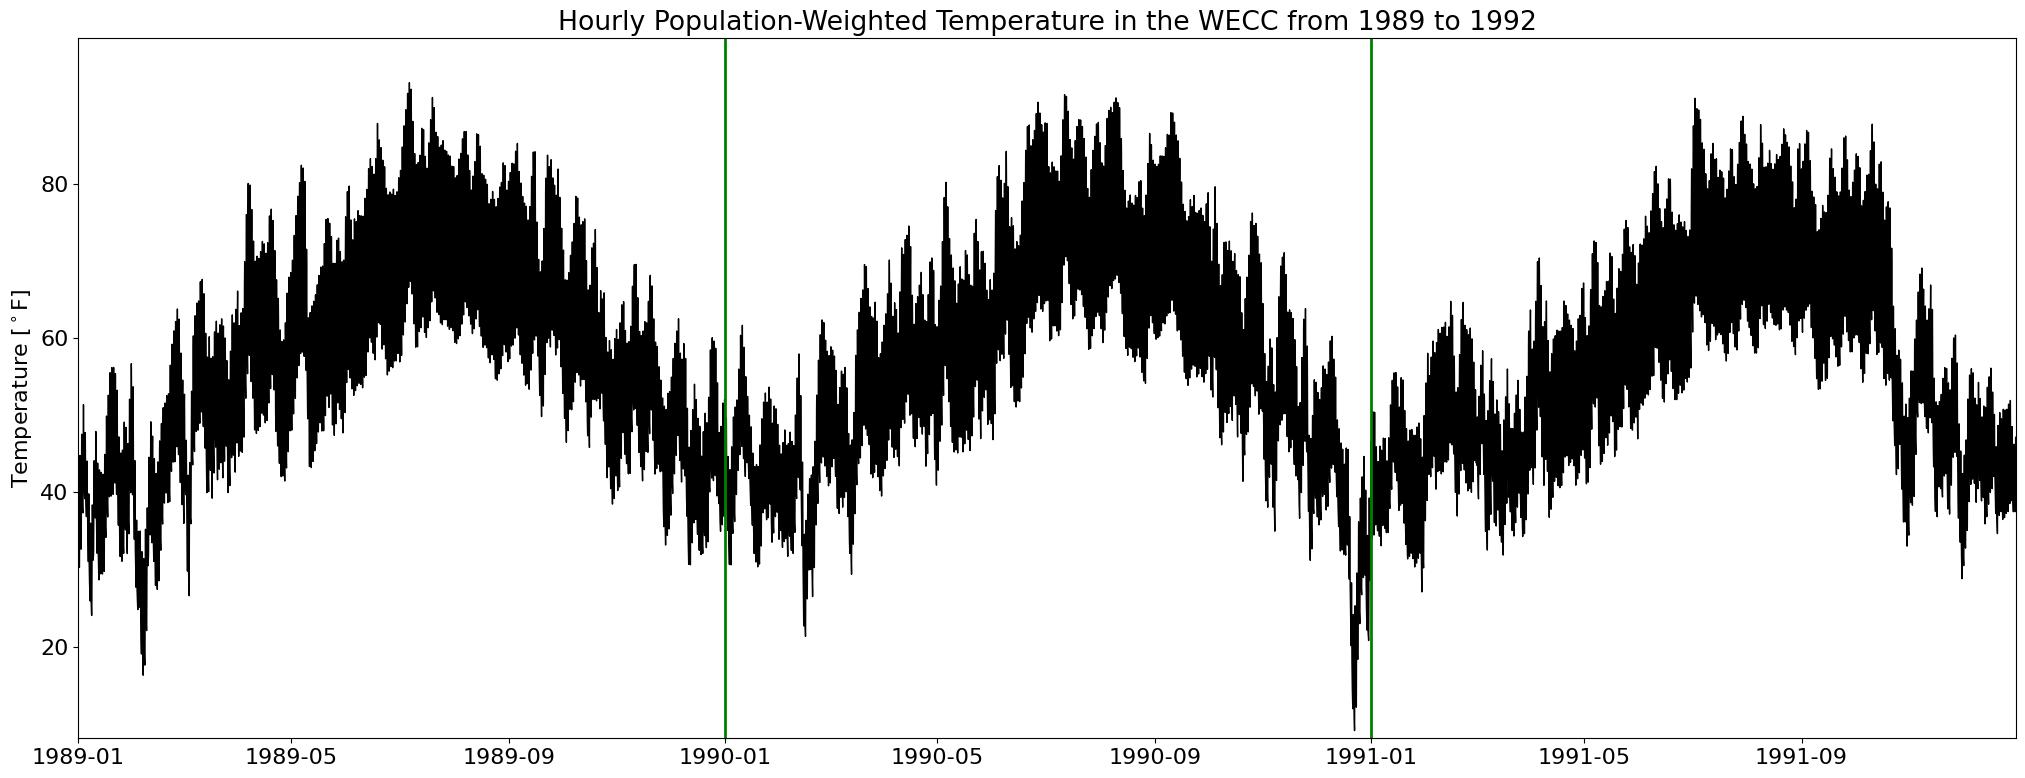

In [45]:
# Make the plot:
plt.figure(figsize=(25, 20))
plt.rcParams['font.size'] = 16
plt.subplot(211)
plt.plot(met_df['Time_UTC'], met_df['T2'], color='k', linestyle='-', linewidth=1)
plt.plot([datetime.date(1990, 1, 1), datetime.date(1990, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.plot([datetime.date(1991, 1, 1), datetime.date(1991, 1, 1)], [met_df['T2'].min()-2, met_df['T2'].max()+2], color='g', linestyle='-', linewidth=2)
plt.xlim([datetime.date(1989, 1, 1), datetime.date(1991, 12, 31)])
plt.ylim([met_df['T2'].min()-1, met_df['T2'].max()+1])
plt.xlabel('')
plt.ylabel('Temperature [$^\circ$F]')
plt.title(('Hourly Population-Weighted Temperature in the ' + ics_to_plot + ' from 1989 to 1992'))

plt.savefig(os.path.join(image_output_dir, (ics_to_plot + '_Temperature_1989_1992.png')), dpi=300, bbox_inches='tight', facecolor='white')
